## Lab 9 (March 28):
### Functions

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>
Special thanks to **Holly Palmer**, whose material has been very helpful in preparing this lab

  Today, we are going to look at:   
 - [Functions]()

 






<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [1]:
library(tidyverse)       
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



---

<br> <br>


## **1. Introduction**
**Motivation:** Let's suppose we want to _**normalize**_ every variable (column) of the dataset below:

Normalization is defined by: 
$$
x_{scaled} = \dfrac{x - x_{min}}{x_{max} - x_{min}}
$$
<br>  

This is a useful method of feature engineering for somealgorithms as Neural networks, K-Nearest Neighbor (KNN) and K-Means clustering.

In [5]:
## Dataset
df <- tibble(
  a = rnorm(10, 3, 3),
  b = rnorm(10, 8, 2),
  c = rnorm(10, 50, 10),
  d = rnorm(10, 75, 25)
)

print(df)

## apply min-max feature scaling
df$a <- (df$a - min(df$a, na.rm = TRUE)) / 
  (max(df$a, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$b <- (df$b - min(df$b, na.rm = TRUE)) / 
  (max(df$b, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$c <- (df$c - min(df$c, na.rm = TRUE)) / 
  (max(df$c, na.rm = TRUE) - min(df$c, na.rm = TRUE))
df$d <- (df$d - min(df$d, na.rm = TRUE)) / 
  (max(df$d, na.rm = TRUE) - min(df$d, na.rm = TRUE))

# A tibble: 10 × 4
         a     b     c     d
     <dbl> <dbl> <dbl> <dbl>
 1 -1.64   10.4   39.9  93.0
 2 -0.0717 12.1   44.4 111. 
 3  6.16    7.08  49.7 101. 
 4  1.96    8.71  51.6  37.4
 5  6.42    8.22  62.3  90.0
 6  0.553   3.37  58.6  75.4
 7  4.32   10.6   46.6  99.9
 8  4.63    7.67  46.1  51.0
 9  4.40    7.96  48.0 106. 
10  5.56    6.21  25.4  34.2


What do you realise?
- This is a common task which could rather be automated
- Some mistakes could happen by copy-pasting

<br>   

These and many other problems could be solved using functions $functions$.
We could:  
- Automate common tasks
- Help make codes easier to understand
- Reduce code deprication - makes it easier to debug and update
- Eliminate copy and pasting mistakes 

 


<br>   
## **2. Steps in creating a Function**
There are three key parts of a function viz:
- Name
- Arguments
- Body    

Functions have the **syntax**:   


    name <- function(inputArgs) {
       function body
    } 

 ### **(2.1) Analyze inputs: How many inputs will the function have?**   
 Let us look at our examples:  
 _**[Challenge:]** How many inputs (arguments) are there in each function?_

 - Fahrenheit to Celsius:
   $$C = (F - 32) \times \dfrac{5}{9}$$
 - Quadratic Formula:
   $$ x = \dfrac{-b\pm\sqrt{b^2 - 4ac}}{2a}$$
 - Min-Max Normalization: 
 $$
x_{scaled} = \dfrac{x - x_{min}}{x_{max} - x_{min}}
$$    

### **(2.2) Simplify:** 
Pull out intermediate steps, label to make it more clear and easy to follow. Simplify variables too if it makes sense to you.

In [ ]:
## (1) fahrenheit to celsius
tmp <- (temp_F - 32) 

## (2) quadratic formula
D <- b*b - 4*a*c ## the discriminant


## (3) min-max
x   <- df$a
rng <- range(x, na.rm = TRUE)
(x - rng[1]) / (rng[2] - rng[1])

### **(3) Write a Descriptive Name then put it into a function**

Generally, function _names_ should be **verbs**, and _arguments_ should be **nouns**, because functions generally DO SOMTHING. There are some exceptions: nouns are ok if the function computes a very well known noun, or accessing some property of an object. A good sign that a noun might be a better choice is if you’re using a very broad verb like “get”, “compute”, “calculate”, or “determine”.

Good variable names:
- Are consistent- cases, etc eg. `str_extract`
- Are clear
- Similar functions similar names
- Should not use predefined function names such as `c`, `TRUE` or `T` etc



In [13]:
## (1) fahrenheit to celsius
fahr_to_cel <-  function(temp_F) {
  tmp <- (temp_F - 32)
  tmp*5/9 
}

## (2) quadratic formula
quad_roots <- function(a, b, c){
  D   <- b*b - 4*a*c
  x1  <- (-b + D)/2*a
  x2  <- (-b - D)/2*a
  out <- c(x1, x2)
  out
}


## (3) min-max
min_max_scaler <- function(x) {
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}

### **(4) Check that it works**

In [ ]:
# (1) fahrenheit to celsius
fahr_to_cel(temp_F = 32)

fahr_to_cel(temp_F = 72)

fahr_to_cel(temp_F = -20)

fahr_to_cel(temp_F = 120)

In [14]:
## (2) quadratic formula
quad_roots(a = 1, b = -5, c = 6)

quad_roots(a = 2, b = 16, c = 9)


[1] 3 2

[1]  168 -200

In [ ]:
# (3) min-max
min_max_scaler(x = c(0, 5, 10))

min_max_scaler(x = c(-1, 8, 4, 6, NA))



In [ ]:
## Our previous problem revisited
df$a <- min_max_scaler(x = df$a)
df$b <- min_max_scaler(x = df$b)
df$c <- min_max_scaler(x = df$c)
df$d <- min_max_scaler(x = df$d)

_[**Challenge:**]_ Write functions that compute the following:   

1. $$x_{scaled} = \dfrac{x-\mu}{\sigma}$$ where
$\mu = \bar{x} =  \sum_{i = 1}^{n}\dfrac{x_i}{n}$ and $\sigma = sd(x)$
2. $$Var(x) = \dfrac{1}{n-1}\sum_{i = 1}^{n}(x_i - \bar{x})^2$$ where $$\bar{x} = \sum_{i = 1}^{n}\dfrac{x_i}{n}$$
3. $$Skew(x) = \dfrac{\frac{1}{n-2}(\sum_{i = 1}^{n}(x_i - \bar{x})^3)}{Var(x)^{3/2}}$$

In [15]:
## Your code here

<br>    
## **3. Conditional Execution**
Sometimes, you the function or a part of the function body to run when certain condition(s) are met. Common ways of doing this include the use of `if`, `ifelse`, `if...else` `switch` and some variants like `cut`. We explore these below:

### **(3.1) If statements**
**Syntax:**
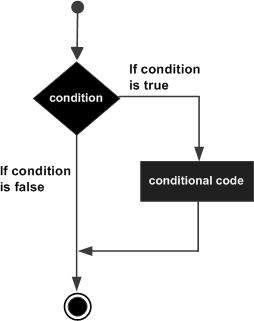

    if (condition) {
        # code executed when condition is TRUE
    }


In [ ]:
## Example
x <- 10L
if(is.integer(x)) {
   print("X is an Integer")
}

### **(3.2) If else and Ifelse statements** 
This is useful for two conditions   

**Syntax 1 (If else)**:
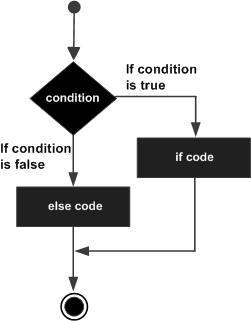

    if (condition) {
      # code executed when condition is TRUE
    } else {
      # code executed when condition is FALSE
    }

**Syntax 2 (Ifelse)**:  

    ifelse(condition, x <IF TRUE>, y <OTHERWISE>)  

In [19]:
## Example

## (1) If Else
classify20 <- function (y) {
  if (y < 20) {
    "Too low" 
  } else {
    "Too high"
  }
}

## (2) Ifelse
classify20_ie <- function (y) {
  ifelse(y < 20, "Too low", "Too high")
}

In [ ]:
classify20(5)
classify20_ie(5)

In [ ]:
classify20(22)
classify20_ie(22)

### **(3.3 Multiple conditions: If...else if... statements, switch statements and cut**
For multiple conditions:  

**Syntax 1 (If... else if...):**

    if (this) {
       # do that 
    } else if (that) {
       # do something else
    } else {
     # 
    }


**Syntax 2 (Switch statement):**
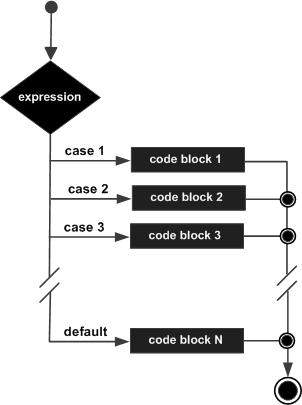

    switch(expression, case1, case2, case3....)

**Note:** _Switch is very useful when the `dplyr` version is employed which is what I will use for this lab_

**Syntax 3 (cut)**
Sometimes, cut can be use for multiple conditions. The syntax is given by:

    cut(x, breaks, labels = NULL,
        include.lowest = FALSE, right = TRUE, dig.lab = 3,
        ordered_result = FALSE, …)

In [23]:
## Examples
## (1) If else if
classify_temp <- function(temp) {
  if (temp <= 0) {
    "freezing"
  } else if (temp <= 10) {
    "cold"
  } else if (temp <= 20) {
    "cool"
  } else if (temp <= 30) {
    "warm"
  } else {
    "hot"
  }
}

## (2) Switch (case_when from dplyr)
classify_temp_sw <- function(temp){
  case_when(
  temp <= 0 ~ "freezing",
  temp <= 10 ~ "cold",
  temp <= 20 ~ "cool",
  temp <= 30 ~ "warm",
  TRUE ~ "hot"
)
}

## (3) Cut
classify_temp_cut <- function(temp){
  cut(temp, 
    breaks = c(-100,0,10,20,30,100), 
    labels = c("freezing", "cold", "cool", "warm", "hot"))
}

In [ ]:
ann_arbor <- 15

classify_temp(temp = ann_arbor)
classify_temp_sw(temp = ann_arbor)
classify_temp_cut(temp = ann_arbor)

<br>   
## **4. Checking Values/ Parameter Validation & Return Statements**
We will look at two important things to know about functions here:
- stopping code execution if there is a flag : `stop`, `stopifnot`
- returning an output if a condition is met: `return`

### **(4.1) Checking for Values**
It is a common practice to check for the valitidy of inputs submitted in the arguemnets of a function. Let us consider and discuss the example below:

**Example (4.1.1)**

In [27]:
## (1) integer division
int_Division <- function(a, b) {
  div = a / b
  #change to int
  floor(div)
}

## Why this error?
int_Division(0,0)

[1] NaN

In [ ]:
## Validate that we do not devide by 0
int_Division <- function(a, b) {
  #division
  if (b == 0) {
    ##calls an error
    stop("cannot divide by 0...", call. = FALSE)
  }
  div = a / b
  #change to int
  floor(div)
}

## Call
int_Division(0,0)

**Example (4.1.2)**   

Consider the Weighted sum formula:
$$
W = \dfrac{\sum_{i=1}^nw_iX_i}{\sum_{i=1}^nw_i}$$
 where:  
 $W$= 	weighted average   
 $n$	= 	number of terms to be averaged   
 $w_{i}$	= 	weights applied to x values and   
 $X_{i}$	= 	data values to be averaged


In [ ]:
## Code
wt_mean <- function(x, w) {
  sum(x * w) / sum(w)
}

## Call
wt_mean(x = 1:6, w = 1:3)

**Note:** _While an output is returned, this is rather misleading because the weights and the data should be of equal length. Let's fix this by setting a validation flag_: 

In [ ]:
## Validation flag
wt_mean <- function(x, w) {
  if (length(x) != length(w)) {
    stop("`x` and `w` must be the same length", call. = FALSE)
  }
  sum(w * x) / sum(w)
}

## Call
wt_mean(x = 1:6, w = 1:3)

**Note**: _Another potential problem is if our the data or the weights have NAs_.

In [ ]:
wt_mean(x = c(10:50, NA), w = 1:6)

In [ ]:
## Function update
wt_mean <- function(x, w, na.rm = FALSE) {
  if (!is.logical(na.rm)) {
    stop("`na.rm` must be logical")
  }
  if (length(na.rm) != 1) {
    stop("`na.rm` must be length 1")
  }
  if (length(x) != length(w)) {
    stop("`x` and `w` must be the same length", call. = FALSE)
  }
  
  if (na.rm) {
    miss <- is.na(x) | is.na(w)
    x <- x[!miss]
    w <- w[!miss]
  }
  sum(w * x) / sum(w)
}

**Note:** _While the update above fixes our issues, the validation has become rather complex and monotonous. We can use the `stopifnot` flag to validate several flags at a go

In [ ]:
## More efficient Validation
wt_mean <- function(x, w, na.rm = FALSE) {
  stopifnot(is.logical(na.rm), length(na.rm) == 1)
  stopifnot(length(x) == length(w))
  
  if (na.rm) {
    miss <- is.na(x) | is.na(w)
    x <- x[!miss]
    w <- w[!miss]
  }
  sum(w * x) / sum(w)
}

## Call
wt_mean(1:6, 6:1, na.rm = "hello")


<br>   
### **(4.1) Return Statements**
By default, R returns the last statement of a function. Sometimes, however, you would want to return a value if an output condition is met. Let us for instance combine the `min_max_` scaler function with the `standardizer` function from Challenge 1.1

In [ ]:
## Generalize the min_max and standardizer functions
scaler <- function(x, type = c("min_max", "standardize"){
  if(type == "min_max"){
      rng <- range(x, na.rm = TRUE)
      return((x - rng[1]) / (rng[2] - rng[1]))
  }else{
      ## CODE FOR STANDARDIZER
      return()
  }  
}

## **5. Exercise**
### **5.1 OLS Estimates:**
You have probably seen the simple linear regression model given by:
$$y_i = \alpha + \beta x_i + \epsilon_i$$
for a dataset $\{(x_i, y_i)_{[i \in n]}\}$.   
The OLS estimates for the intercept ($\alpha$) and the slope ($\beta$) are given by:  

$$
\hat{\alpha} = \bar{y} - (\hat{\beta} \cdot \bar{x}); \quad \quad \hat{\beta} =   \dfrac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n}(x_i - \bar{x})^2}
$$

where $$\bar{x} = \sum_{i = 1}^{n}\dfrac{x_i}{n}; \quad \quad \bar{y} = \sum_{i = 1}^{n}\dfrac{y_i}{n}$$


**Question:** Write your own (a single) function that returns both $\hat{\alpha}$ and $\hat{\beta}$. Test this function on the data:

In [33]:
## Your code here
x <- sample(size = 20, x = 1:50, replace = TRUE)
y <- rnorm(n = 20, 45, 3)

<br><br>   
### **5.2 Grading Algorithm**:
Write a function that accpets two inputs:
- students' exam 1 scores
- students' exam 2 scores

Compute a curved total score as follows
- obtain total exam score from the two exams above
- curve this total score as: $10\sqrt{Total}$

Now assign letter grades for the students as:
- A - 90-100
- B - 80-89
- C - 70-79
- D - 60-69
- Credit - 50-59
- Fail - 49 and below


**Note:** Your overall output should be a `tibble` with columns :
- **ID** (just sequence of natural numbers based on the size of the input data)- **Exam 1**
- **Exam 2**
- **Total (curved)** 
- **Grade**

In [ ]:
## Your code here